In [256]:
import pandas as pd

In [257]:
train_df=pd.read_csv('train_ML_IOT.csv')

In [258]:
b=train_df.head()

In [259]:
import datetime

In [260]:
import datetime
c=[]
for i in train_df['DateTime']:
    i=str(i)
    day=pd.Timestamp(i)
    day_no=day.day_of_week
    c.append(day_no)
    

In [261]:
train_df['no']=c

In [262]:
weekend=[]
for i in train_df['no']:
    if i in (5,6):
        weekend.append(1)
    else:
        weekend.append(0)

In [263]:
train_df['weekend']=weekend

In [264]:
train_df.head()

,DateTime,Junction,Vehicles,ID,no,weekend
0,2015-11-01 00:00:00,1,15,20151101001,6,1
1,2015-11-01 01:00:00,1,13,20151101011,6,1
2,2015-11-01 02:00:00,1,10,20151101021,6,1
3,2015-11-01 03:00:00,1,7,20151101031,6,1
4,2015-11-01 04:00:00,1,9,20151101041,6,1


In [265]:
test_df=pd.read_csv('test_ML_IOT.csv')

In [266]:
len(test_df)

11808

In [267]:
train_df.head()

,DateTime,Junction,Vehicles,ID,no,weekend
0,2015-11-01 00:00:00,1,15,20151101001,6,1
1,2015-11-01 01:00:00,1,13,20151101011,6,1
2,2015-11-01 02:00:00,1,10,20151101021,6,1
3,2015-11-01 03:00:00,1,7,20151101031,6,1
4,2015-11-01 04:00:00,1,9,20151101041,6,1


In [268]:
train_df=train_df.drop(['ID'],axis=1)

In [269]:
df1=train_df[train_df['Junction']==1]

In [270]:
df1.shape

(14592, 5)

In [271]:
df1.head()

,DateTime,Junction,Vehicles,no,weekend
0,2015-11-01 00:00:00,1,15,6,1
1,2015-11-01 01:00:00,1,13,6,1
2,2015-11-01 02:00:00,1,10,6,1
3,2015-11-01 03:00:00,1,7,6,1
4,2015-11-01 04:00:00,1,9,6,1


In [272]:
df1['DateTime']=pd.to_datetime(df1['DateTime'])

C:\Users\Shree\AppData\Local\Temp\ipykernel_5252\3516956759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DateTime']=pd.to_datetime(df1['DateTime'])


In [273]:
df1=df1.set_index(df1['DateTime'])

In [274]:
df1.head()

,DateTime,Junction,Vehicles,no,weekend
DateTime,,,,,
2015-11-01 00:00:00,2015-11-01 00:00:00,1,15,6,1
2015-11-01 01:00:00,2015-11-01 01:00:00,1,13,6,1
2015-11-01 02:00:00,2015-11-01 02:00:00,1,10,6,1
2015-11-01 03:00:00,2015-11-01 03:00:00,1,7,6,1
2015-11-01 04:00:00,2015-11-01 04:00:00,1,9,6,1


In [275]:
df1.tail()

,DateTime,Junction,Vehicles,no,weekend
DateTime,,,,,
2017-06-30 19:00:00,2017-06-30 19:00:00,1,105,4,0
2017-06-30 20:00:00,2017-06-30 20:00:00,1,96,4,0
2017-06-30 21:00:00,2017-06-30 21:00:00,1,90,4,0
2017-06-30 22:00:00,2017-06-30 22:00:00,1,84,4,0
2017-06-30 23:00:00,2017-06-30 23:00:00,1,78,4,0


In [276]:
df1=df1.drop(['Junction','DateTime'],axis=1)

In [277]:
import matplotlib.pyplot as plt

In [278]:
df1=df1.drop(['no'],axis=1)

In [279]:
df1

,Vehicles,weekend
DateTime,,
2015-11-01 00:00:00,15,1
2015-11-01 01:00:00,13,1
2015-11-01 02:00:00,10,1
2015-11-01 03:00:00,7,1
2015-11-01 04:00:00,9,1
...,...,...
2017-06-30 19:00:00,105,0
2017-06-30 20:00:00,96,0
2017-06-30 21:00:00,90,0


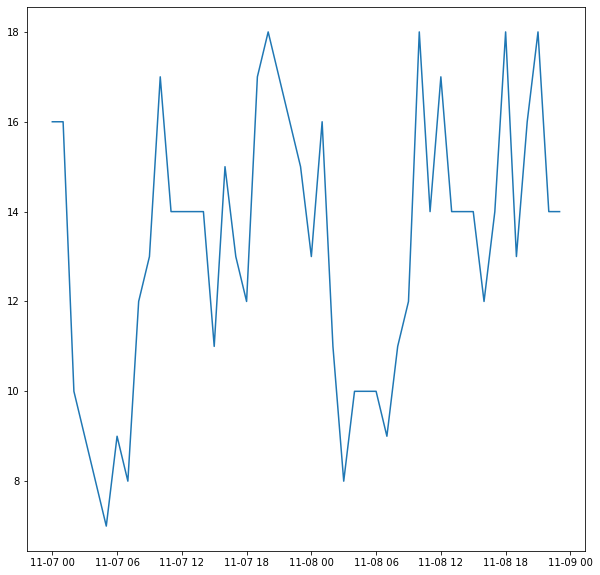

In [280]:
### for weekend ie for  saterday,sundauy
plt.figure(figsize=(10,10))
plt.plot(df1.iloc[144:192,[0]])

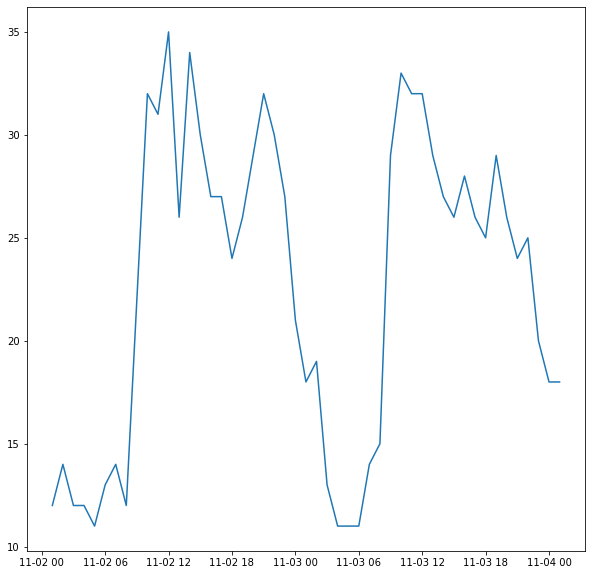

In [281]:
### graph for weekday ie monday and tuseday
plt.figure(figsize=(10,10))
plt.plot(df1.iloc[25:74,[0]])

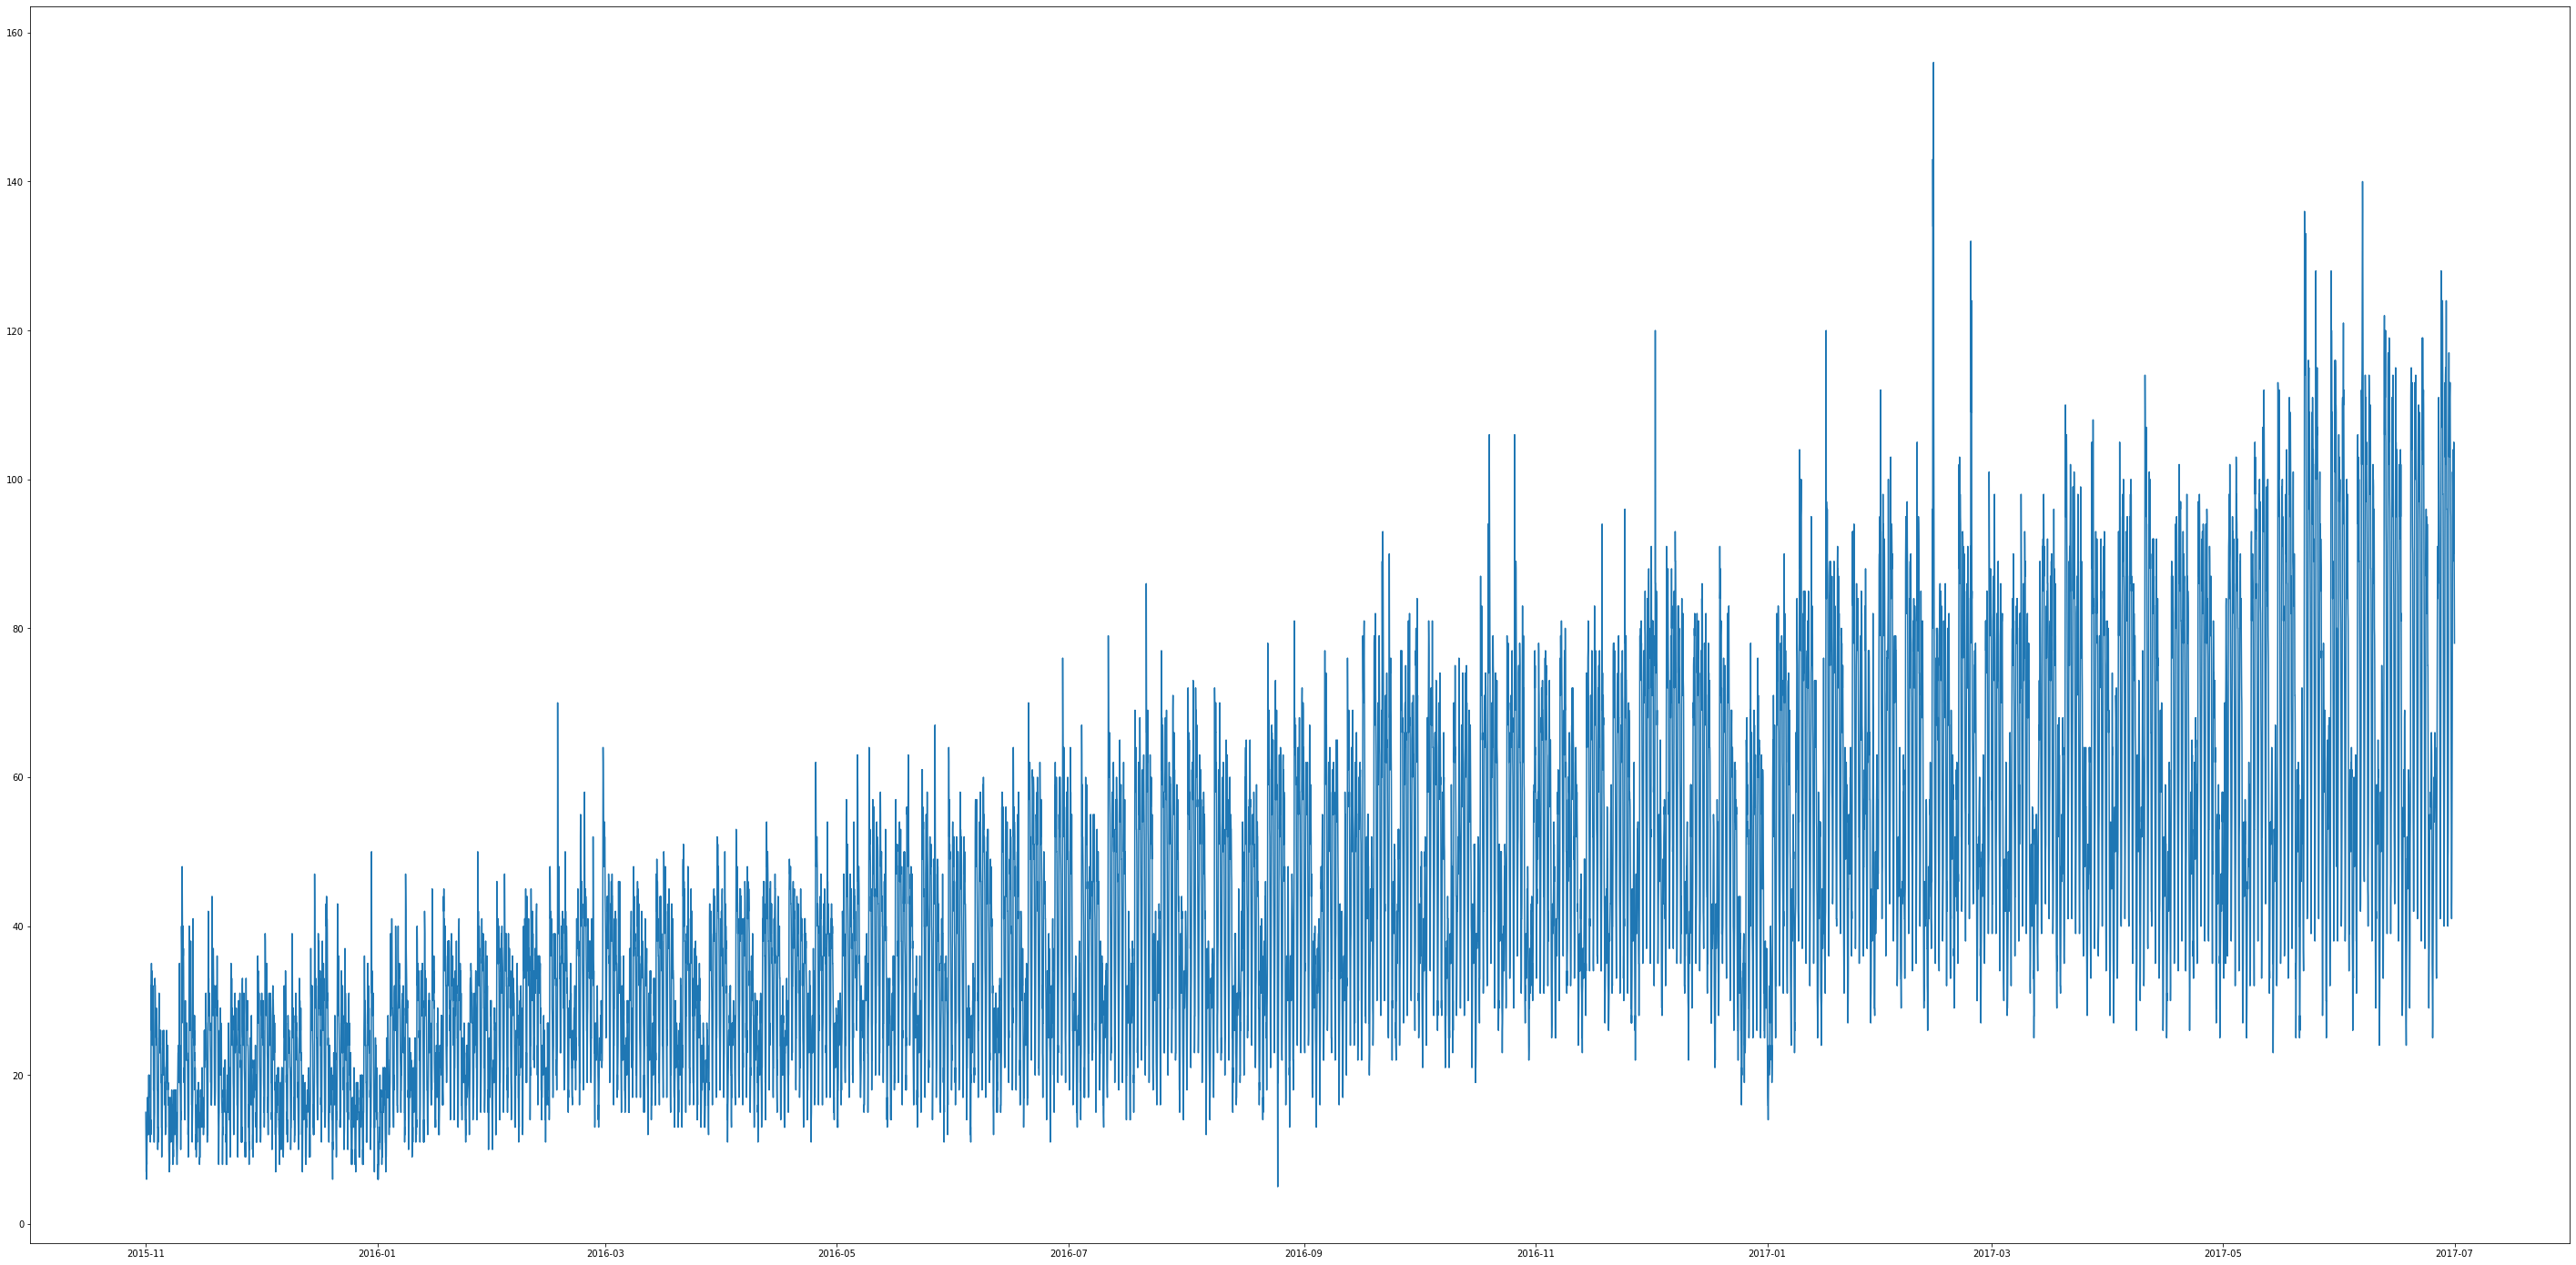

In [282]:
plt.figure(figsize=(50,25))
plt.plot(df1['Vehicles'])

In [283]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [284]:
seasonal=seasonal_decompose(df1['Vehicles'],period=12)

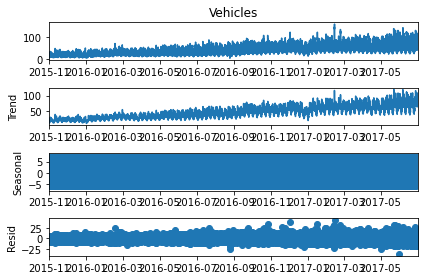

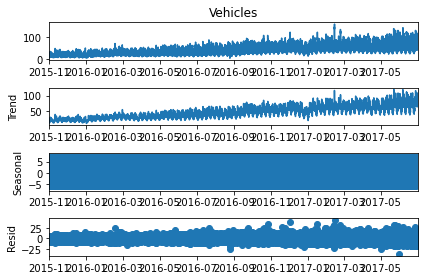

In [285]:
seasonal.plot()

In [286]:
### model has seasonality of 12 hours

In [287]:
### checking for stationarity

In [288]:
### applying ADF test

In [289]:
# ho= model is not stationary
# ha= model is stationary

In [290]:
from statsmodels.tsa.stattools import adfuller

In [291]:
adfuller(df1['Vehicles'])

(-7.148077688287136,
 3.1938429963545185e-10,
 42,
 14549,
 {'1%': -3.4307995466445482,
  '5%': -2.8617386797172126,
  '10%': -2.566875752496508},
 85618.8049930823)

In [292]:
# as p_value is less than 0.05 we reject the null
 # and hence model is stationary

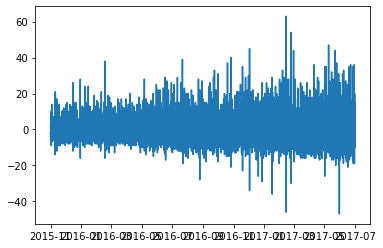

In [293]:
plt.plot(df1['Vehicles'].diff())

In [294]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

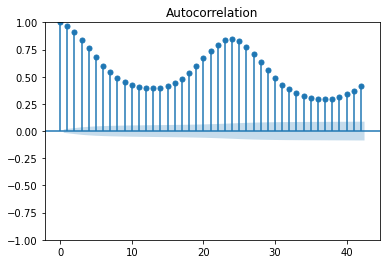

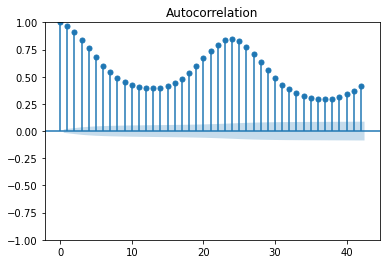

In [295]:
plot_acf(df1['Vehicles'])

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


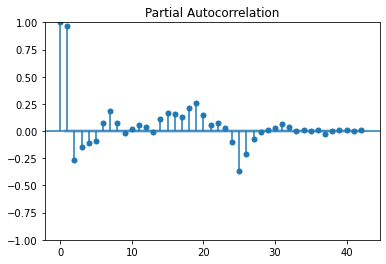

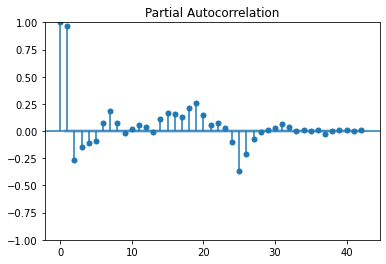

In [296]:
plot_pacf(df1['Vehicles'])

In [297]:
### hence value of p=3,q=0,d=0,s=12

In [298]:
### without weekends

In [299]:
len(df1)*65

948480

In [300]:
train=df1.iloc[0:10000,[0]]

In [301]:
test=df1.iloc[10000::,[0]]

In [302]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [303]:
import pmdarima

In [304]:
from pmdarima import auto_arima

In [305]:
#auto_arima(df1['Vehicles'])

In [306]:
model=SARIMAX(train,order=(2,1,2))

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [307]:
sarimax_model=model.fit()

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [308]:
pred_values=sarimax_model.predict(start=10000,end=len(df1))

In [309]:
### testting model performance on mse

In [310]:
import numpy as np

In [311]:
mse_actual=np.mean(np.square(test))

C:\Users\Shree\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [312]:
mse_actual

Vehicles    4605.879355
dtype: float64

In [313]:
mse_pred_values=np.mean(np.square(pred_values))

In [314]:
mse_pred_values

4036.8837382041424

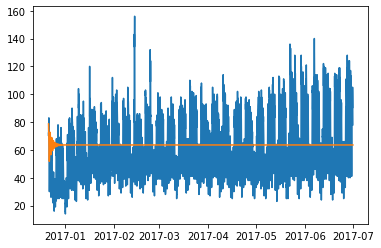

In [315]:
plt.plot(test)
plt.plot(pred_values)

In [316]:
### using weekend values

In [317]:
a=df1.iloc[:10000,[1]]

In [318]:
#auto_arima(df1['Vehicles'],exog=[[df1['weekend']]])

In [319]:
model=SARIMAX(train,order=(2,1,2),exog=a)

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [320]:
exog_model=model.fit()

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [321]:
pred_values_exog=exog_model.predict(start=10000,end=len(df1),exog=[[df1.iloc[9999::,[1]]]])

In [322]:
pred_values

2016-12-21 16:00:00    78.690085
2016-12-21 17:00:00    77.418361
2016-12-21 18:00:00    75.307306
2016-12-21 19:00:00    72.528195
2016-12-21 20:00:00    69.288020
                         ...    
2017-06-30 20:00:00    63.530548
2017-06-30 21:00:00    63.530548
2017-06-30 22:00:00    63.530548
2017-06-30 23:00:00    63.530548
2017-07-01 00:00:00    63.530548
Freq: H, Name: predicted_mean, Length: 4593, dtype: float64

In [323]:
mse_pred_exog=np.mean(np.square(pred_values_exog))

In [324]:
mse_pred_exog

3870.2236169979533

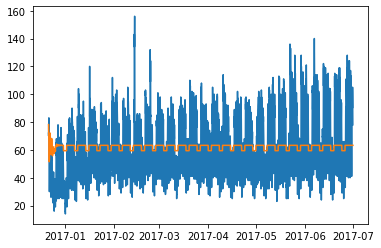

In [325]:
plt.plot(test)
plt.plot(pred_values_exog)

### applying LSTM

In [326]:
train_df=df1.iloc[:,:]


In [327]:
no_d_past=7
no_d_future=1

In [328]:
x_train=[]
y_train=[]

In [329]:
for i  in range(no_d_past,len(train_df)-no_d_future+1):
    x_train.append(train_df.iloc[i-no_d_past:i,::])
    y_train.append(train_df.iloc[i+no_d_future-1:i+no_d_future,[0]])

In [330]:
x_train1=np.array(x_train)

In [331]:
y_train1=np.array(y_train)

In [332]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [333]:
model=Sequential()

In [334]:
model.add(LSTM(64,activation='relu',input_shape=(7,2),return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
#model.add(LSTM(16,activation='relu',return_sequences=False))
#model.add(Dense(20),activation='relu')
model.add(Dense(1))


In [335]:
model.compile(optimizer='adam',loss='mse')

In [336]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 64)             17152     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________


In [337]:
model.fit(x_train1,y_train1, epochs=10,validation_split=0.2)

Epoch 1/10
365/365 [==============================] - 25s 36ms/step - loss: 74.1637 - val_loss: 75.6279
Epoch 2/10
365/365 [==============================] - 10s 28ms/step - loss: 27.0343 - val_loss: 44.9340
Epoch 3/10
365/365 [==============================] - 10s 28ms/step - loss: 28.2214 - val_loss: 50.5736
Epoch 4/10
365/365 [==============================] - 11s 30ms/step - loss: 25.6358 - val_loss: 42.5191
Epoch 5/10
365/365 [==============================] - 10s 28ms/step - loss: 23.8537 - val_loss: 48.2946
Epoch 6/10
365/365 [==============================] - 10s 28ms/step - loss: 23.8252 - val_loss: 47.2185
Epoch 7/10
365/365 [==============================] - 10s 29ms/step - loss: 23.1844 - val_loss: 54.0996
Epoch 8/10
365/365 [==============================] - 10s 28ms/step - loss: 23.3232 - val_loss: 66.9618
Epoch 9/10
365/365 [==============================] - 10s 28ms/step - loss: 22.9396 - val_loss: 46.8932
Epoch 10/10
365/365 [==============================] - 12s 32ms/

In [338]:
test_df=pd.read_csv('test_ML_IOT.csv')

In [339]:
a=len(test_df)

In [340]:
pred_model=model.predict(x_train1[-a:])

369/369 [==============================] - 7s 13ms/step


In [341]:
test_df['predicted_no_cars']=pred_model

In [342]:
train_df.tail()

,Vehicles,weekend
DateTime,,
2017-06-30 19:00:00,105,0
2017-06-30 20:00:00,96,0
2017-06-30 21:00:00,90,0
2017-06-30 22:00:00,84,0
2017-06-30 23:00:00,78,0


In [343]:
test_df.head()

,DateTime,Junction,ID,predicted_no_cars
0,2017-07-01 00:00:00,1,20170701001,38.960121
1,2017-07-01 01:00:00,1,20170701011,35.036812
2,2017-07-01 02:00:00,1,20170701021,32.033497
3,2017-07-01 03:00:00,1,20170701031,22.961462
4,2017-07-01 04:00:00,1,20170701041,22.499886


In [344]:
df_forcast=pd.DataFrame({'Date':np.array(test_df['DateTime']),'no_of_cars':test_df['predicted_no_cars']})

In [345]:
df_forcast.head()

,Date,no_of_cars
0,2017-07-01 00:00:00,38.960121
1,2017-07-01 01:00:00,35.036812
2,2017-07-01 02:00:00,32.033497
3,2017-07-01 03:00:00,22.961462
4,2017-07-01 04:00:00,22.499886


In [346]:
df_forcast['Date']=pd.to_datetime(df_forcast['Date'])

In [347]:
df_forcast.head()

,Date,no_of_cars
0,2017-07-01 00:00:00,38.960121
1,2017-07-01 01:00:00,35.036812
2,2017-07-01 02:00:00,32.033497
3,2017-07-01 03:00:00,22.961462
4,2017-07-01 04:00:00,22.499886


In [348]:
df=pd.read_csv('train_ML_IOT.csv')

In [349]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [350]:
df_original=pd.DataFrame({'Date':np.array(df['DateTime']),'no_of_cars':df['Vehicles'],'junction1':df['Junction']})

In [351]:
df1=df_original[df_original['junction1']==1]

In [352]:
df1['Date']=pd.to_datetime(df1['Date'])

C:\Users\Shree\AppData\Local\Temp\ipykernel_5252\580751001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'])


In [353]:
df1.head()

,Date,no_of_cars,junction1
0,2015-11-01 00:00:00,15,1
1,2015-11-01 01:00:00,13,1
2,2015-11-01 02:00:00,10,1
3,2015-11-01 03:00:00,7,1
4,2015-11-01 04:00:00,9,1


In [354]:
df1.shape

(14592, 3)

In [355]:
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='no_of_cars'>

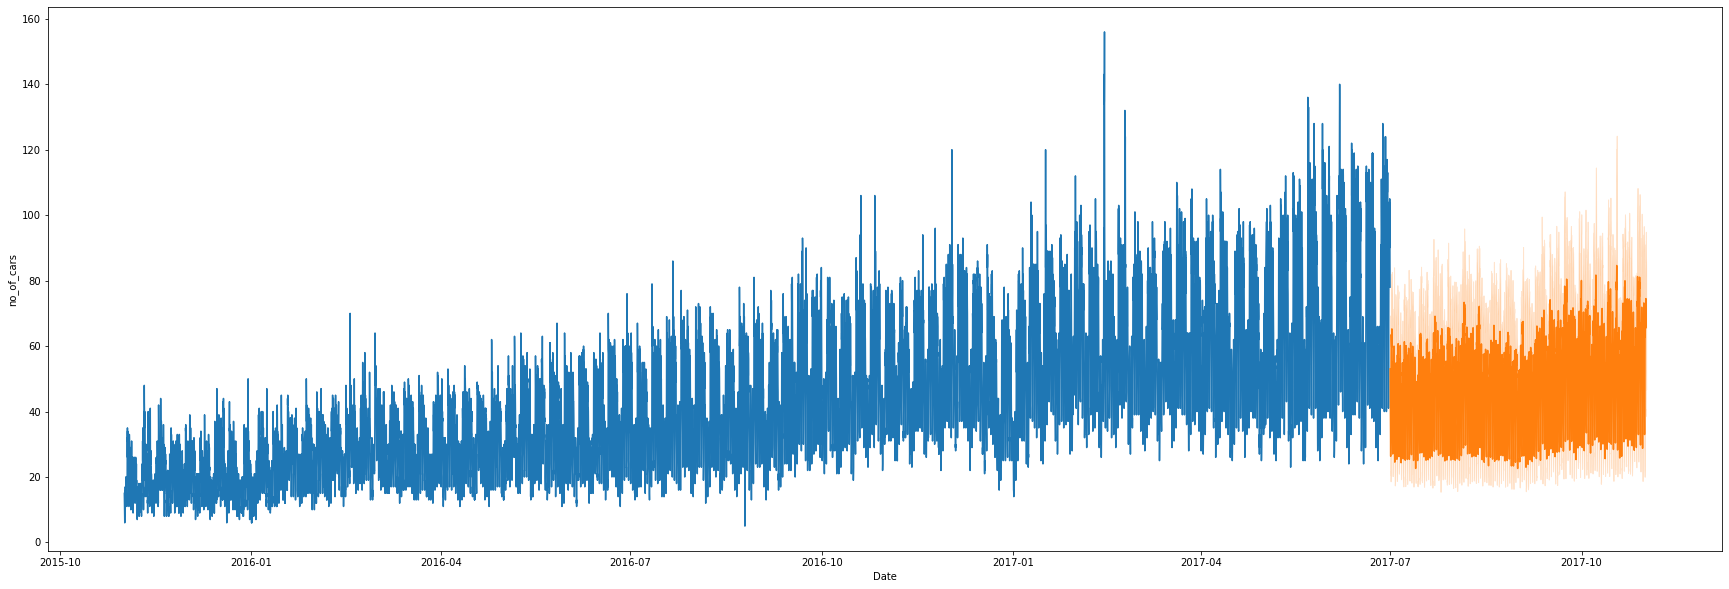

In [356]:
plt.figure(figsize=(30,10))
sns.lineplot(x=df1['Date'],y=df1['no_of_cars'])
sns.lineplot(x=df_forcast['Date'],y=df_forcast['no_of_cars'])

In [357]:
### here we can see LSTM is performing far better